In [1]:
# %pip install numpy
# %pip install scikit-learn
# % pip install --force-reinstall -v --prefer-binary matplotlib==3.8.2
# %pip install pyarrow


# Linear Regression

## About
LR searches for a relationship between variables. I thionk of this as the traditional scatterplot with line of best fit.

LR attempts to find a linear mapping function containing regression coefficients. Differences between the map function and the actual data are called residuals. LR should minimize residuals through sum of squares approach. 

## Fitting
LR is susceptible to under and over fitting. Underfitting due to the simple model not able to capture complexity in the data. Overfitting due to a highly complex model seeing correlation that doesn't exist.

## Approach
- numpy
- scikit-learn
- pandas


Fit: 0.8583982094200078, Intercept: 91.42857142857144, Slope: [-16.97142857]


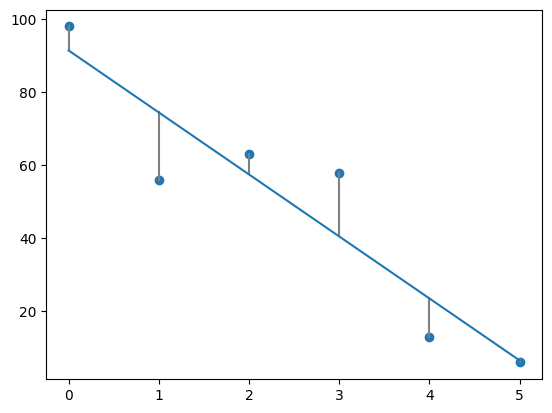

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

PRINT_MODEL_PREDICTIONS = False
R_SQ_FIT_VALUE = 0.6

# create x-data, reshaped into N x 1
x = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)

model = LinearRegression()

# randomly create y-data if keep it if the model loosely fits
r_sq = 0.0
while r_sq < R_SQ_FIT_VALUE:
    y = np.random.randint(0,100,6)
    model.fit(x, y)
    r_sq = model.score(x, y)

print(f"Fit: {r_sq}, Intercept: {model.intercept_}, Slope: {model.coef_}")

# model predictions
y_pred = model.predict(x)

if PRINT_MODEL_PREDICTIONS:
    print(f"model predicts:")
    for i in range(len(x)):
        print(f"{x[i][0]:<2} | {y_pred[i].round(1):<3}")

# display residuals by creating pairs of points at same x, with y values taken from model/data
for idx, element in enumerate(x):
    y_new = y_pred[idx], y[idx]
    x_new = x[idx][0], x[idx][0]
    plt.plot(x_new, y_new, color='grey')


plt.scatter(x=x, y=y)
plt.plot(x, ((model.coef_ * x) + model.intercept_))
plt.show()